---
# Cairo University Faculty of Engineering
## Deep Learning
## Assignment 5_2

---

Please write your full name here
- **Name** : "Alaa Yasser"

## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits.
Within this notebook you will find instructions in each section for how to complete the assignment.

Pay close attention to the instructions. Feel free to add extra cells into the notebook as required.

### Let's get started!

We'll start by running some imports, and loading the dataset. You are free to make further imports throughout the notebook as you wish.

In [ ]:
import tensorflow as tf
from scipy.io import loadmat

For this assignmnet, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`.

- If using Colab: You should store these files in Drive.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
import requests
from google.colab import drive

destination_folder = 'datasets/svhn'

!mkdir -p "{destination_folder}"

url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'


response = requests.get(url)


with open(f'{destination_folder}/test_32x32.mat', 'wb') as f:
    f.write(response.content)

In [ ]:
url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'

response = requests.get(url)

with open(f'{destination_folder}/train_32x32.mat', 'wb') as f:
    f.write(response.content)

In [ ]:
train = loadmat('/content/datasets/svhn/train_32x32.mat')
test = loadmat('/content/datasets/svhn/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure. Make sure that the images are displayed in grayscale!!

In [ ]:
import numpy as np

train_images = np.array(train['X'])
train_labels = np.array(train['y'])

test_images = np.array(test['X'])
test_labels = np.array(train['y'])


In [ ]:

train_images = np.transpose(train['X'], (3,0,1,2))
test_images = np.transpose(test['X'], (3,0,1,2))

In [ ]:
train_images_gray = np.mean(train_images, axis=-1, keepdims=True)/255.
test_images_gray = np.mean(test_images, axis=-1, keepdims=True)/255.

train_images_gray = tf.cast(train_images_gray, tf.float32)
test_images_gray = tf.cast(test_images_gray, tf.float32)

mean_value = tf.reduce_mean(train_images_gray)
std_value = tf.math. reduce_std(train_images_gray)

train_images_gray_normalized = (train_images_gray - mean_value) / std_value
test_images_gray_normalized = (test_images_gray - mean_value) / std_value


train_images_gray_normalized = tf.cast(train_images_gray_normalized, tf.float32)
test_images_gray_normalized = tf.cast(test_images_gray_normalized, tf.float32)


In [ ]:
train_labels = train['y'].flatten()
test_labels = test['y'].flatten()

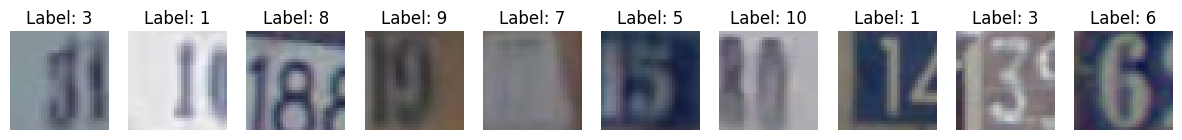

In [ ]:
import matplotlib.pyplot as plt
import random

def display_random_images(images, labels, num_images=10):
    random_indices = random.sample(range(len(images)), num_images)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')

    plt.show()


display_random_images(train_images, train_labels, num_images=10)

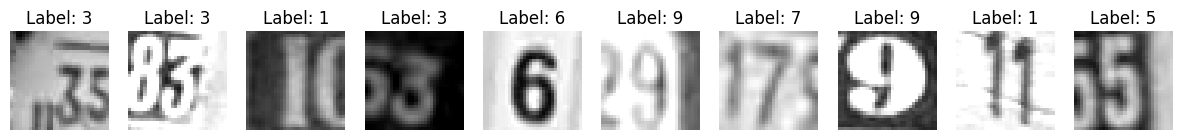

In [ ]:
def display_random_gray_images(images, labels, num_images=10):

    random_indices = random.sample(range(len(images)), num_images)


    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx], cmap='gray', vmin=-2, vmax=1)
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

display_random_gray_images(train_images_gray_normalized, train_labels, num_images=10)



## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output.
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least one **callback** during training, like a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
train_images_gray[0].shape

TensorShape([32, 32, 1])

In [ ]:
print(np.unique(train_labels))
print(np.unique(test_labels))



[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
False
False


In [ ]:

model = Sequential([
   Flatten(name='flatten_1', input_shape = (32,32,1)),
   Dense(128, activation = 'relu',name='dense_1'),
   Dense(128, activation='relu',name='dense_2'),
   Dense(128, activation='relu',name='dense_3'),
   Dense(128, activation='relu',name='dense_4'),
   Dense(64, activation='relu', name='dense_5'),
   Dense(10, activation='softmax', name='output')
])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)              

In [ ]:
checkpoint = ModelCheckpoint('/content/models/mlp_checkpoint.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_adjusted = train_labels - 1
test_labels_adjusted = test_labels - 1

train_labels_one_hot = to_categorical(train_labels_adjusted , num_classes=10)
test_labels_one_hot = to_categorical(test_labels_adjusted , num_classes=10)

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_gray_normalized, train_labels_one_hot,
                    epochs=30,
                    validation_data=(test_images_gray_normalized, test_labels_one_hot),
                    callbacks=[checkpoint])


Epoch 1/30
2279/2290 [============================>.] - ETA: 0s - loss: 1.2488 - accuracy: 0.5923
Epoch 1: val_loss improved from inf to 1.14042, saving model to /content/models/mlp_checkpoint.h5
2290/2290 [==============================] - 15s 6ms/step - loss: 1.2469 - accuracy: 0.5930 - val_loss: 1.1404 - val_accuracy: 0.6592
Epoch 2/30
  26/2290 [..............................] - ETA: 9s - loss: 0.8618 - accuracy: 0.7248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2286/2290 [============================>.] - ETA: 0s - loss: 0.8746 - accuracy: 0.7283
Epoch 2: val_loss improved from 1.14042 to 0.91559, saving model to /content/models/mlp_checkpoint.h5
2290/2290 [==============================] - 12s 5ms/step - loss: 0.8744 - accuracy: 0.7284 - val_loss: 0.9156 - val_accuracy: 0.7260
Epoch 3/30
2286/2290 [============================>.] - ETA: 0s - loss: 0.7679 - accuracy: 0.7612
Epoch 3: val_loss improved from 0.91559 to 0.89169, saving model to /content/models/mlp_checkpoint.h5
2290/2290 [==============================] - 14s 6ms/step - loss: 0.7680 - accuracy: 0.7612 - val_loss: 0.8917 - val_accuracy: 0.7345
Epoch 4/30
2277/2290 [============================>.] - ETA: 0s - loss: 0.6987 - accuracy: 0.7828
Epoch 4: val_loss improved from 0.89169 to 0.85721, saving model to /content/models/mlp_checkpoint.h5
2290/2290 [==============================] - 12s 5ms/step - loss: 0.6983 - accuracy: 0.7829 - val_loss: 0.8572 - val_accuracy: 0.7508
Epoch 5/3

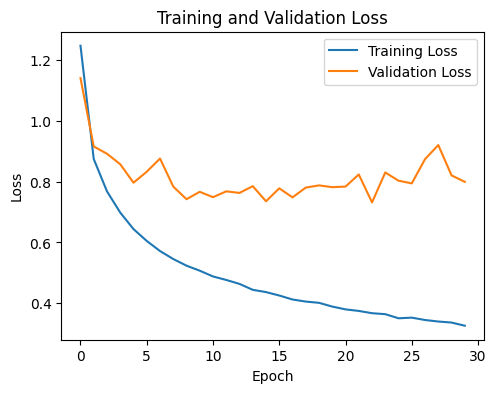

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

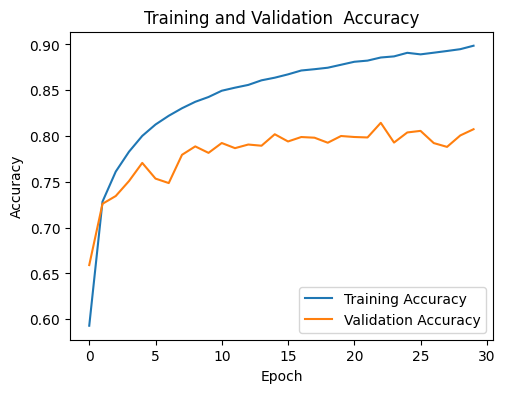

In [ ]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation  Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images_gray_normalized, test_labels_one_hot, verbose=2)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

814/814 - 2s - loss: 0.7993 - accuracy: 0.8074 - 2s/epoch - 2ms/step
Test Loss: 0.7993
Test Accuracy: 0.8074


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output.
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model **must** use fewer trainable parameters than your MLP model.
* Compile and train the model (recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least one callback during training, like a ModelCheckpoint callback.
* **You should aim to beat the MLP model performance with fewer parameters!**
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
    MaxPool2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),
    BatchNormalization(),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                     

In [ ]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint_cnn = ModelCheckpoint('/content/models/cnn_checkpoint.h5',
                                 monitor='val_loss',
                                 save_best_only=True,
                                 verbose=1)

In [ ]:
history_cnn = cnn_model.fit(train_images_gray_normalized, train_labels_one_hot,
                            epochs=30,
                            validation_data=(test_images_gray_normalized, test_labels_one_hot),
                            callbacks=[checkpoint_cnn])


Epoch 1/30
2284/2290 [============================>.] - ETA: 0s - loss: 1.0400 - accuracy: 0.6680
Epoch 1: val_loss improved from inf to 0.58251, saving model to /content/models/cnn_checkpoint.h5
2290/2290 [==============================] - 15s 6ms/step - loss: 1.0392 - accuracy: 0.6682 - val_loss: 0.5825 - val_accuracy: 0.8265
Epoch 2/30
  23/2290 [..............................] - ETA: 10s - loss: 0.6595 - accuracy: 0.8016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2282/2290 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.8079
Epoch 2: val_loss improved from 0.58251 to 0.48350, saving model to /content/models/cnn_checkpoint.h5
2290/2290 [==============================] - 13s 6ms/step - loss: 0.6221 - accuracy: 0.8080 - val_loss: 0.4835 - val_accuracy: 0.8559
Epoch 3/30
2286/2290 [============================>.] - ETA: 0s - loss: 0.5232 - accuracy: 0.8407
Epoch 3: val_loss improved from 0.48350 to 0.43680, saving model to /content/models/cnn_checkpoint.h5
2290/2290 [==============================] - 13s 6ms/step - loss: 0.5232 - accuracy: 0.8407 - val_loss: 0.4368 - val_accuracy: 0.8744
Epoch 4/30
2288/2290 [============================>.] - ETA: 0s - loss: 0.4662 - accuracy: 0.8562
Epoch 4: val_loss improved from 0.43680 to 0.42418, saving model to /content/models/cnn_checkpoint.h5
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4664 - accuracy: 0.8561 - val_loss: 0.4242 - val_accuracy: 0.8763
Epoch 5/3

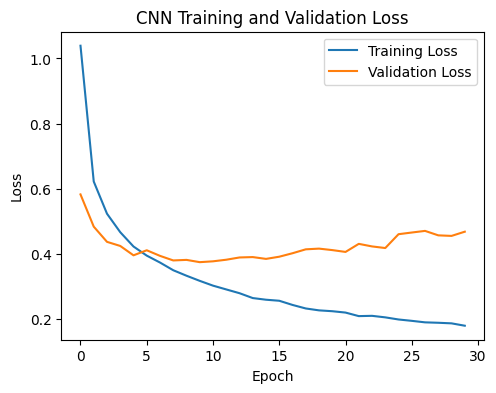

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

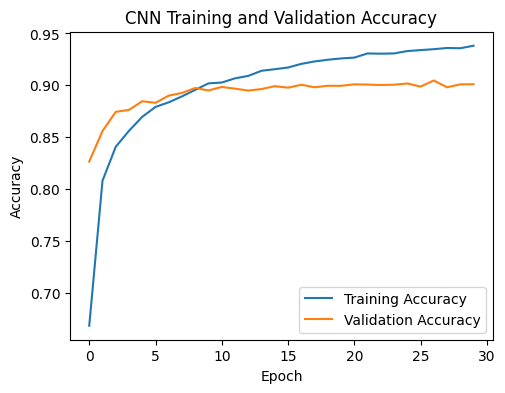

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_images_gray_normalized, test_labels_one_hot, verbose=2)

print(f'Test Loss (CNN): {test_loss_cnn:.4f}')
print(f'Test Accuracy (CNN): {test_accuracy_cnn:.4f}')

814/814 - 2s - loss: 0.4680 - accuracy: 0.9010 - 2s/epoch - 2ms/step
Test Loss (CNN): 0.4680
Test Accuracy (CNN): 0.9010


## 4. Get model predictions
* Load the **best weights** for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
from tensorflow.keras.models import load_model

mlp_model = load_model('/content/models/mlp_checkpoint.h5')

cnn_model = load_model('/content/models/cnn_checkpoint.h5')

In [ ]:
def display_images_with_predictions(model, images, labels, num_images=5):

    random_indices = np.random.choice(len(images), num_images, replace=False)

    plt.figure(figsize=(15, 3 * num_images))
    for i, idx in enumerate(random_indices):
        # image with label
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(images[idx], cmap='gray', vmin=-2, vmax=1)
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')

        # Model prediction
        image = np.expand_dims(images[idx], axis=0)
        prediction = model.predict(image)

        # predictive distribution as a bar chart
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.bar(range(10), prediction.squeeze())
        plt.title("Predictive Distribution")
        plt.xlabel("Class")
        plt.ylabel("Probability")

        # final model prediction
        final_prediction = np.argmax(prediction)+1
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.bar(range(10), [0] * final_prediction + [1] + [0] * (9 - final_prediction), color='green')
        plt.title(f"Model Prediction: {final_prediction}")
        plt.xlabel("Class")
        plt.ylabel("Probability")

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 16ms/step


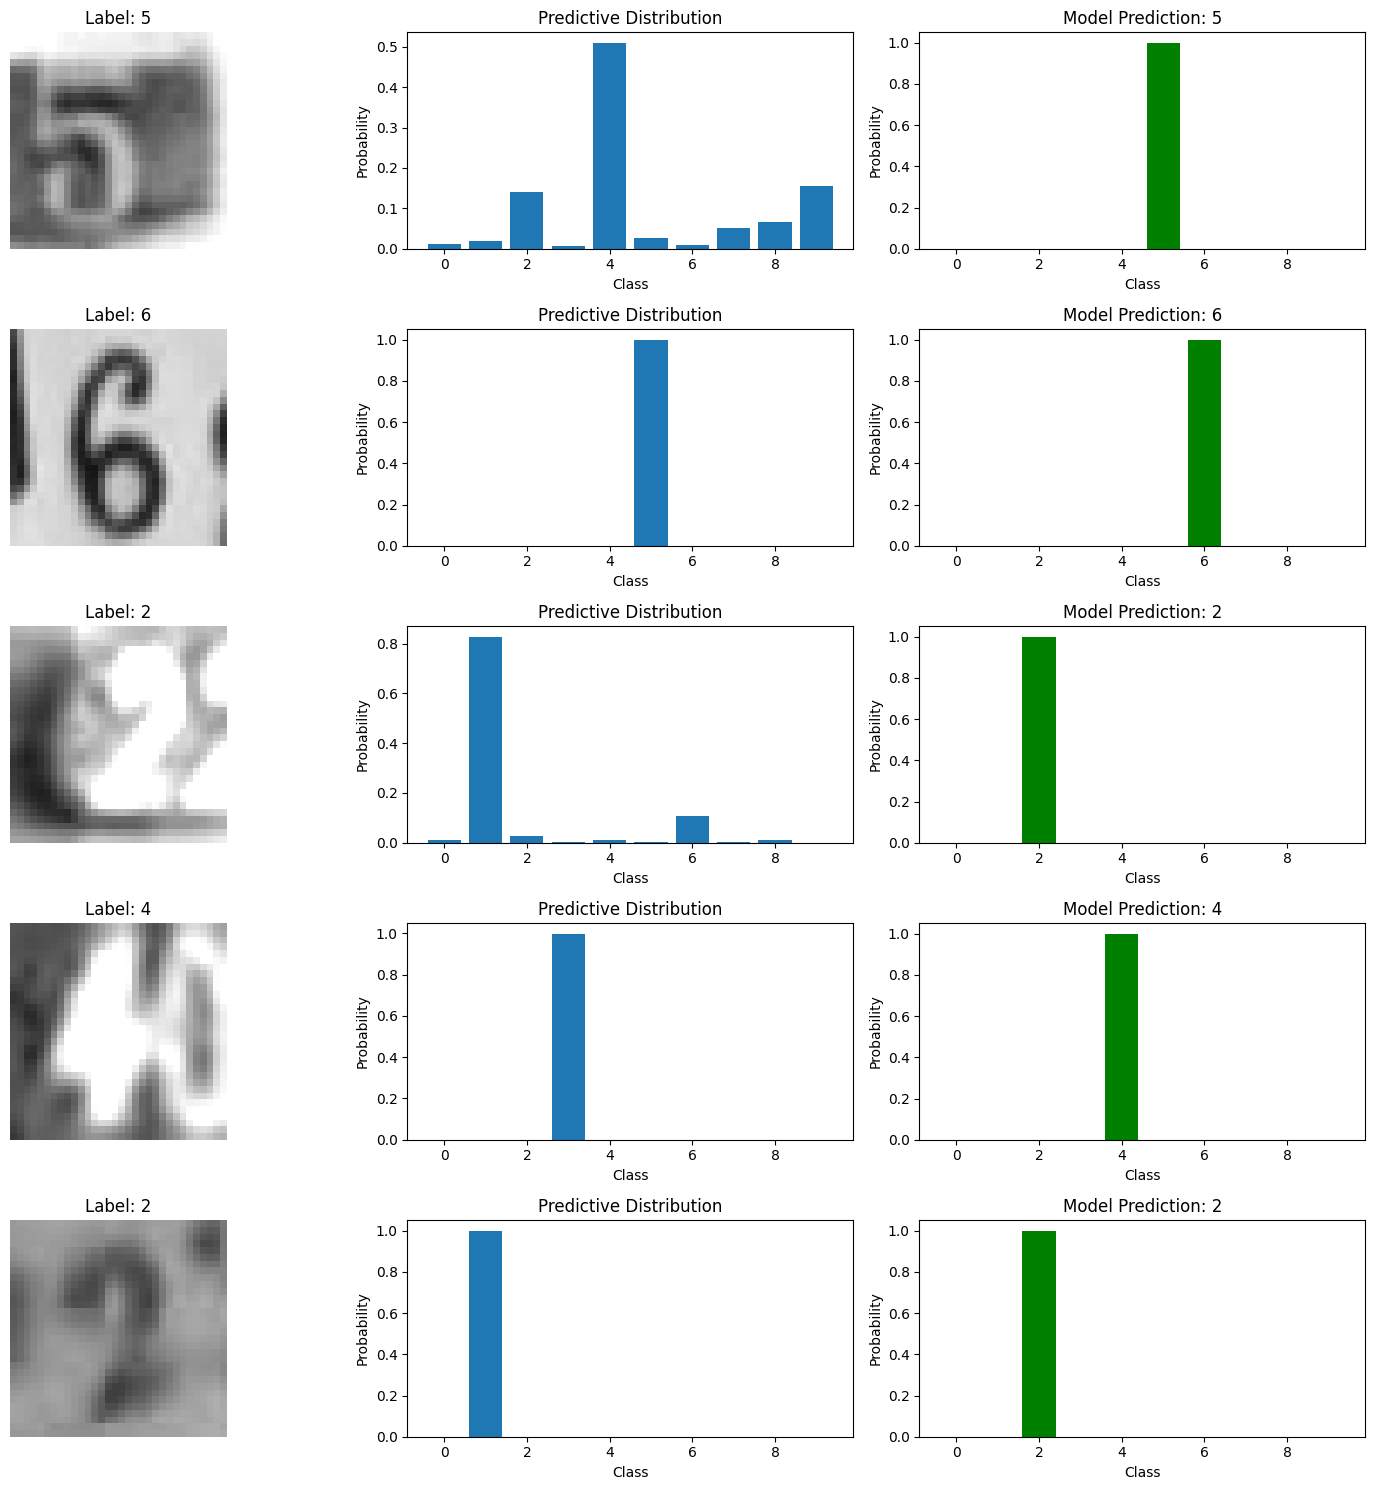

In [ ]:
display_images_with_predictions(mlp_model, test_images_gray_normalized, test_labels)

1/1 [==============================] - 0s 19ms/step


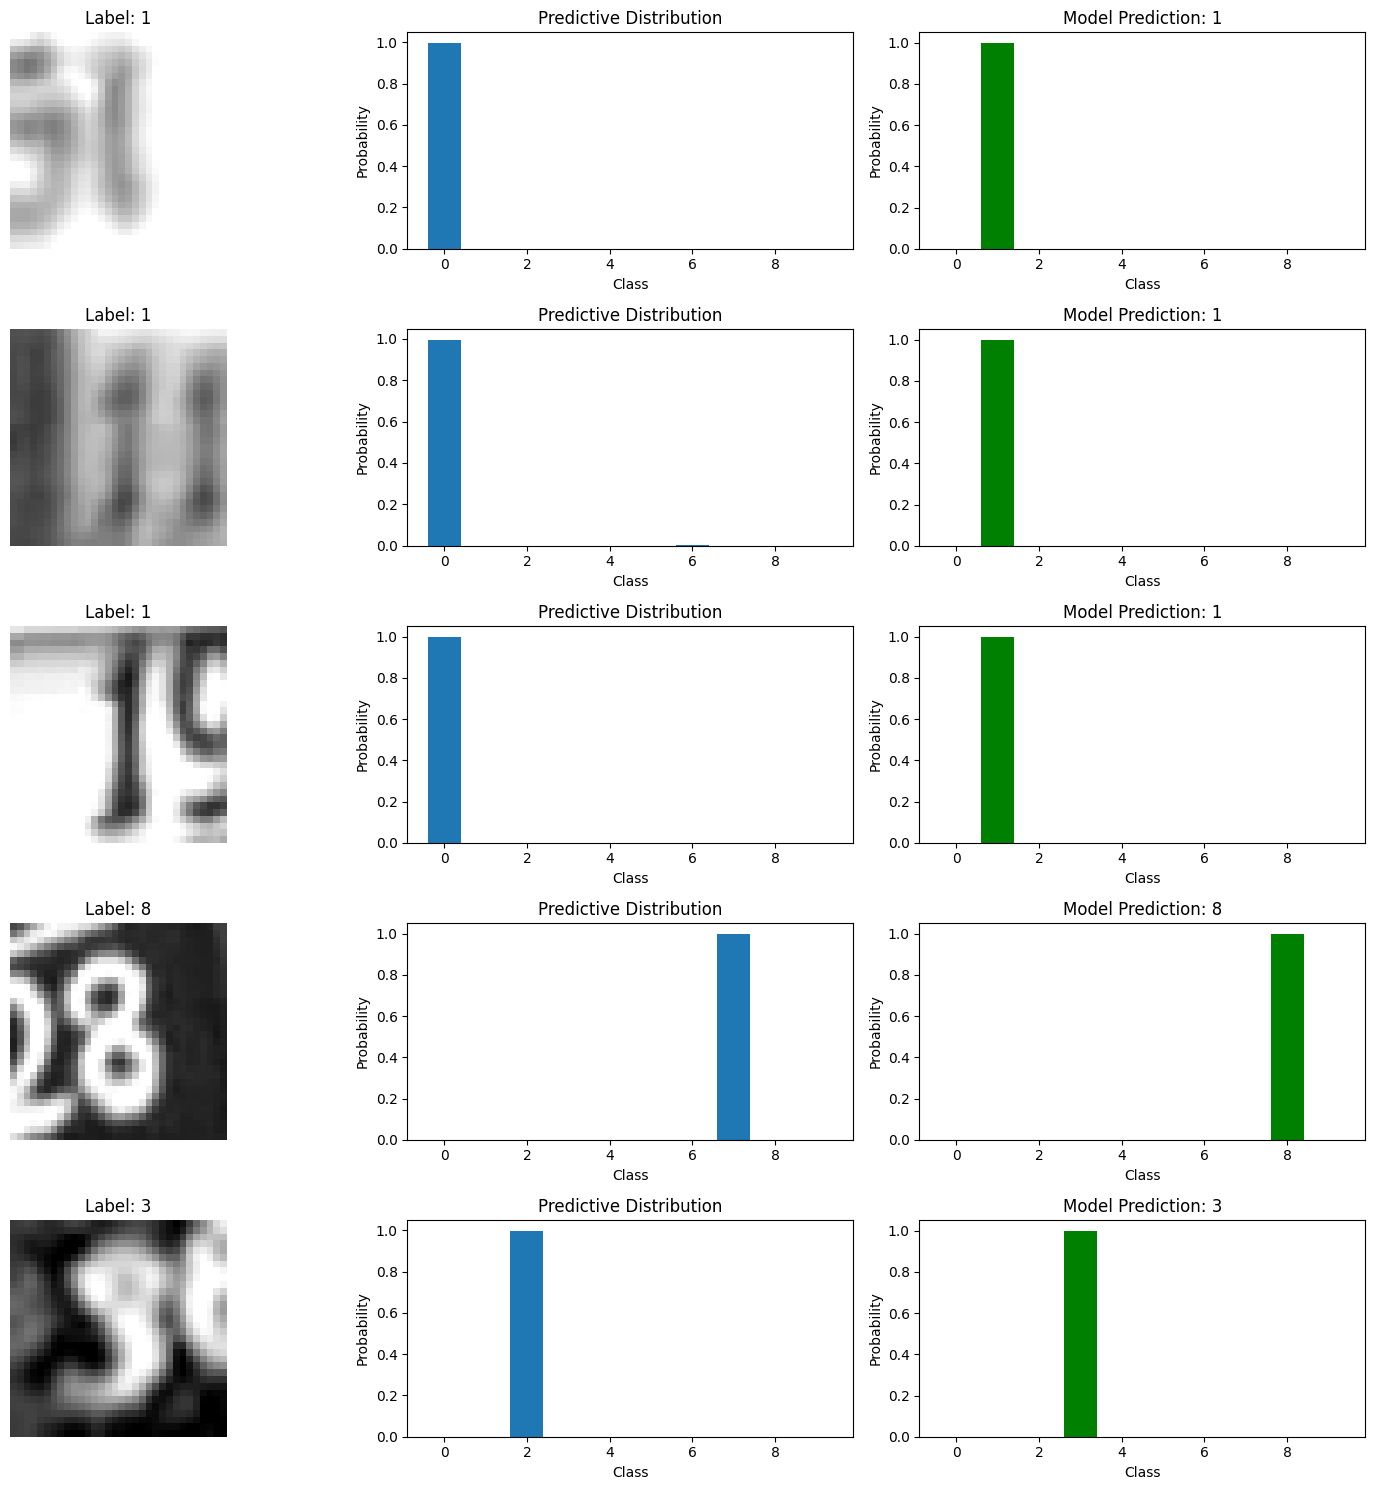

In [ ]:
display_images_with_predictions(cnn_model, test_images_gray_normalized, test_labels)